In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# set the max columns to none
pd.set_option('display.max_columns', None)
# set the max columns to none
pd.set_option('display.max_rows', None)

In [5]:
df = pd.read_csv('data/housing_data.csv')

### 3. Data Checks
* Check missing values
* Check duplicates
* Check datatypes
* Check the number of unique values of each column
* Check statistics of data set.
* Check number of rows and columns.
* Check various categoeires present in the different categorical column

#### 3.1 Check Missing Values

In [6]:
df.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [ ]:
# Visualize missing
def plot_missing_values(df):
    """ For each column with missing values plot proportion that is missing."""
    data = [(col, df[col].isnull().sum() / len(df)) 
            for col in df.columns if df[col].isnull().sum() > 0]
    col_names = ['column', 'percent_missing']
    missing_df = pd.DataFrame(data, columns=col_names).sort_values('percent_missing')
    pylab.rcParams['figure.figsize'] = (15, 8)
    missing_df.plot(kind='barh', x='column', y='percent_missing'); 
    plt.title('Percent of missing values in colummns');

Removing rows with missing values;
Removing features with high proportion of missing values;
Replacing missing values with a constant value;
Replacing missing values with mean/median/mode (globally or grouped/clustered);
Imputing missing values using models.

#### 3.2 Drop Duplicates

In [7]:
df.duplicated().sum()

0

###### No duplicates in the set.

#### 3.3 Check data types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### 3.4 Checking unique values

In [9]:
df.nunique() 

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          3
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFin

#### 3.5 Check the statistics

In [10]:
df.describe().round()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
count  1460.0      1460.0       1201.0    1460.0       1460.0       1460.0   
mean    730.0        57.0         70.0   10517.0          6.0          6.0   
std     422.0        42.0         24.0    9981.0          1.0          1.0   
min       1.0        20.0         21.0    1300.0          1.0          1.0   
25%     366.0        20.0         59.0    7554.0          5.0          5.0   
50%     730.0        50.0         69.0    9478.0          6.0          5.0   
75%    1095.0        70.0         80.0   11602.0          7.0          6.0   
max    1460.0       190.0        313.0  215245.0         10.0          9.0   

       YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
count     1460.0        1460.0      1452.0      1460.0      1460.0     1460.0   
mean      1971.0        1985.0       104.0       444.0        47.0      567.0   
std         30.0          21.0       181.0       456.0       161.0      442.0   
min       1872.0        1950.0         0.0         0.0         0.0        0.0   
25%       1954.0        1967.0         0.0         0.0         0.0      223.0   
50%       1973.0        1994.0         0.0       384.0         0.0      478.0   
75%       2000.0        2004.0       166.0       712.0         0.0      808.0   
max       2010.0        2010.0      1600.0      5644.0      1474.0     2336.0   

       TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
count       1460.0    1460.0    1460.0        1460.0     1460.0        1460.0   
mean        1057.0    1163.0     347.0           6.0     1515.0           0.0   
std          439.0     387.0     437.0          49.0      525.0           1.0   
min            0.0     334.0       0.0           0.0      334.0           0.0   
25%          796.0     882.0       0.0           0.0     1130.0           0.0   
50%          992.0    1087.0       0.0           0.0     1464.0           0.0   
75%         1298.0    1391.0     728.0           0.0     1777.0           1.0   
max         6110.0    4692.0    2065.0         572.0     5642.0           3.0   

       BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
count        1460.0    1460.0    1460.0        1460.0        1460.0   
mean            0.0       2.0       0.0           3.0           1.0   
std             0.0       1.0       1.0           1.0           0.0   
min             0.0       0.0       0.0           0.0           0.0   
25%             0.0       1.0       0.0           2.0           1.0   
50%             0.0       2.0       0.0           3.0           1.0   
75%             0.0       2.0       1.0           3.0           1.0   
max             2.0       3.0       2.0           8.0           3.0   

       TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
count        1460.0      1460.0       1379.0      1460.0      1460.0   
mean            7.0         1.0       1979.0         2.0       473.0   
std             2.0         1.0         25.0         1.0       214.0   
min             2.0         0.0       1900.0         0.0         0.0   
25%             5.0         0.0       1961.0         1.0       334.0   
50%             6.0         1.0       1980.0         2.0       480.0   
75%             7.0         1.0       2002.0         2.0       576.0   
max            14.0         3.0       2010.0         4.0      1418.0   

       WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
count      1460.0       1460.0         1460.0     1460.0       1460.0   
mean         94.0         47.0           22.0        3.0         15.0   
std         125.0         66.0           61.0       29.0         56.0   
min           0.0          0.0            0.0        0.0          0.0   
25%           0.0          0.0            0.0        0.0          0.0   
50%           0.0         25.0            0.0        0.0          0.0   
75%         168.0         68.0            0.0   

#### 3.6 Number of rows and columns

In [11]:
df.shape

(1460, 81)

##### Insight
* Choose columns to test for colinearity.
* Test different hypothesis: Ie location (neighborhood) highly likely to impact price


In [12]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [23]:
cat_features = df.select_dtypes(include="object")
num_features = df.select_dtypes(exclude="object")


In [ ]:
num_features.groupby(['YrSold',]).num_features.columns.mean()

In [26]:
cat_features.fillna('NONE', inplace=True)


In [27]:
cat_features.head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave  NONE      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave  NONE      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave  NONE      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave  NONE      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave  NONE      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       NONE        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       NONE        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ        NONE     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
0          RFn         TA         TA          Y   NONE  NONE        NONE   
1          RFn         TA         TA          Y   NONE  NONE        NONE   
2          RFn         TA         TA          Y   NONE  NONE        NONE   
3          Unf         TA         TA          Y   NONE  NONE        NONE   
4          RFn         TA         TA          Y   NONE  NONE        NONE   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3       WD       Abnorml  
4       WD        Normal

In [28]:
df1 = pd.concat([num_features, cat_features], axis=1)

In [29]:
df1.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
0     208500       RL   Pave  NONE      Reg         Lvl    AllPub    Inside   
1     181500       RL   Pave  NONE      Reg         Lvl    AllPub       FR2   
2     223500       RL   Pave  NONE      IR1         Lvl    AllPub    Inside   
3     140000       RL   Pave  NONE      IR1         Lvl    AllPub    Corner   
4     250000       RL   Pave  NONE      IR1         Lvl    AllPub       FR2   

  LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle  \
0       Gtl      CollgCr       Norm       Norm     1Fam     2Story     Gable   
1       Gtl      Veenker      Feedr       Norm     1Fam     1Story     Gable   
2       Gtl      CollgCr       Norm       Norm     1Fam     2Story     Gable   
3       Gtl      Crawfor       Norm       Norm     1Fam     2Story     Gable   
4       Gtl      NoRidge       Norm       Norm     1Fam     2Story     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation  \
0  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA      PConc   
1  CompShg     MetalSd     MetalSd       NONE        TA        TA     CBlock   
2  CompShg     VinylSd     Vi

In [22]:
cat_features.Street.unique()

array(['Pave', 'Grvl'], dtype=object)

In [46]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 38 numerical features : ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

We have 43 categorical features : ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual

##### Create list of categorical and numeric

In [40]:
cat_var_list = []
num_var_list = []

for typ in df.columns:
    check = df[typ].dtypes
    if check == 'object':
        cat_var_list.append(typ)
    else:
        num_var_list.append(typ)

In [50]:
for cat in cat_var_list:
    print("Unique Categories in dataset, variable: {}:".format(cat), end=" " )
    print(df[cat].unique())

Unique Categories in dataset, variable: MSZoning: ['RL' 'RM' 'C (all)' 'FV' 'RH']
Unique Categories in dataset, variable: Street: ['Pave' 'Grvl']
Unique Categories in dataset, variable: Alley: [nan 'Grvl' 'Pave']
Unique Categories in dataset, variable: LotShape: ['Reg' 'IR1' 'IR2' 'IR3']
Unique Categories in dataset, variable: LandContour: ['Lvl' 'Bnk' 'Low' 'HLS']
Unique Categories in dataset, variable: Utilities: ['AllPub' 'NoSeWa']
Unique Categories in dataset, variable: LotConfig: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Unique Categories in dataset, variable: LandSlope: ['Gtl' 'Mod' 'Sev']
Unique Categories in dataset, variable: Neighborhood: ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Unique Categories in dataset, variable: Condition1: ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn'

#### 3.7 Explore data

In [14]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [44]:
# Neighborhoods
df['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [45]:
# Number of neighborhoods
len(df['Neighborhood'].unique())

25

In [16]:
def SturgeRule(number_obs):
    return (1 + 3.322 * np.log(number_obs))

In [17]:
SturgeRule(df.shape[0])

25.204728876241315

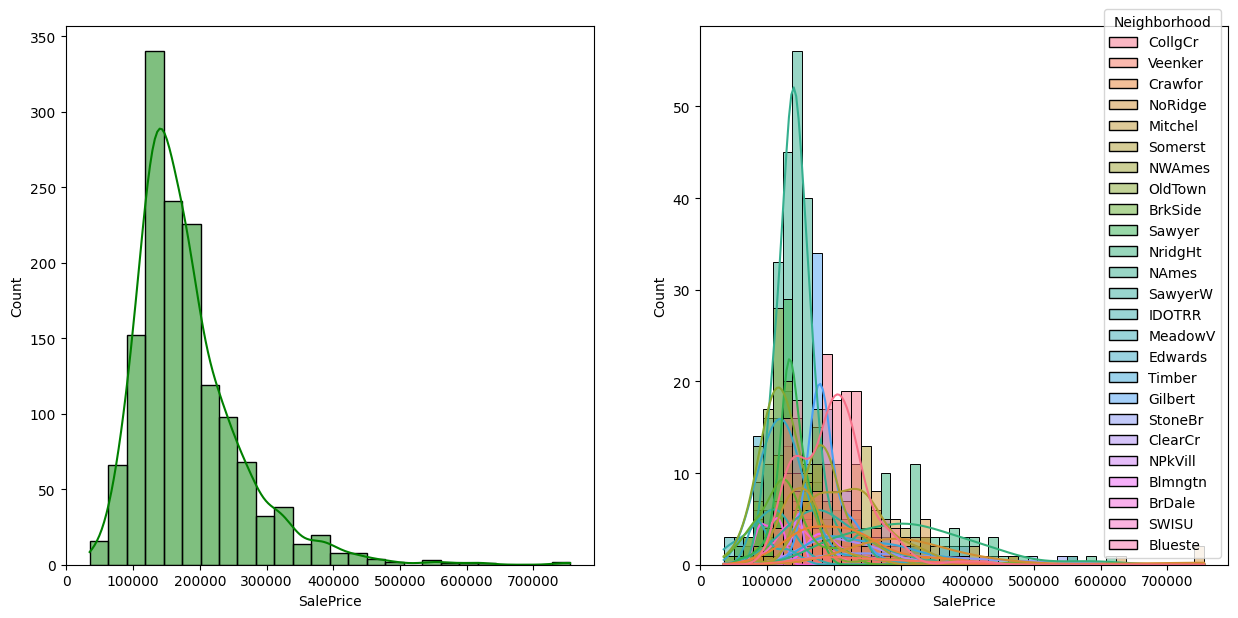

In [19]:
fig, ax = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='SalePrice',bins=26,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df, x='SalePrice', kde=True, hue='Neighborhood')
plt.show()

In [24]:
for loc in df['Neighborhood'].unique():
    maxP = df[df['Neighborhood']==loc]['SalePrice'].max()
    minP = df[df['Neighborhood']==loc]['SalePrice'].min()
    print('Housing prices for {0}, minimium price: {1}, maxium price: {2}, price diff: {3}'.\
          format(loc, minP, maxP, (maxP - minP))
    )

Housing prices for CollgCr, minimium price: 110000, maxium price: 424870, price diff: 314870
Housing prices for Veenker, minimium price: 162500, maxium price: 385000, price diff: 222500
Housing prices for Crawfor, minimium price: 90350, maxium price: 392500, price diff: 302150
Housing prices for NoRidge, minimium price: 190000, maxium price: 755000, price diff: 565000
Housing prices for Mitchel, minimium price: 84500, maxium price: 271000, price diff: 186500
Housing prices for Somerst, minimium price: 144152, maxium price: 423000, price diff: 278848
Housing prices for NWAmes, minimium price: 82500, maxium price: 299800, price diff: 217300
Housing prices for OldTown, minimium price: 37900, maxium price: 475000, price diff: 437100
Housing prices for BrkSide, minimium price: 39300, maxium price: 223500, price diff: 184200
Housing prices for Sawyer, minimium price: 62383, maxium price: 190000, price diff: 127617
Housing prices for NridgHt, minimium price: 154000, maxium price: 611657, pric

#### Most Expensive places to live
* NoRidge: minimium price: 190000, maxium price: 755000, price diff: 565000
* NridgHt: minimium price: 154000, maxium price: 611657, price diff: 457657
* StoneBr: minimium price: 170000, maxium price: 556581, price diff: 386581

In [31]:
for loc in df['Neighborhood'].unique():
    num_houses = df[df['Neighborhood']==loc].shape[0]
    avgHouse = df[df['Neighborhood']==loc]['SalePrice'].mean()
    print("{0} has {1} properties at the average price of {2}.".format(loc, num_houses, np.round(avgHouse,2)))

CollgCr has 150 properties at the average price of 197965.77.
Veenker has 11 properties at the average price of 238772.73.
Crawfor has 51 properties at the average price of 210624.73.
NoRidge has 41 properties at the average price of 335295.32.
Mitchel has 49 properties at the average price of 156270.12.
Somerst has 86 properties at the average price of 225379.84.
NWAmes has 73 properties at the average price of 189050.07.
OldTown has 113 properties at the average price of 128225.3.
BrkSide has 58 properties at the average price of 124834.05.
Sawyer has 74 properties at the average price of 136793.14.
NridgHt has 77 properties at the average price of 316270.62.
NAmes has 225 properties at the average price of 145847.08.
SawyerW has 59 properties at the average price of 186555.8.
IDOTRR has 37 properties at the average price of 100123.78.
MeadowV has 17 properties at the average price of 98576.47.
Edwards has 100 properties at the average price of 128219.7.
Timber has 38 properties at t

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class ColumnSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, dtype):
        self.dtype = dtype
    
    def fit(self, X, y=None):
        """ Get either categorical or numerical columns on fit.
        Store as attribute for future reference"""
        X = X if isinstance(X, pd.DataFrame) else pd.DataFrame(X)
        if self.dtype == 'numerical':
            self.cols = X.select_dtypes(exclude='O').columns.tolist()
        elif self.dtype == 'categorical':
            self.cols = X.select_dtypes(include='O').columns.tolist()
        self.col_idx = [df.columns.get_loc(col) for col in self.cols]
        return self

    def transform(self, X):
        """ Subset columns of chosen data type and return np.array"""
        X = X.values if isinstance(X, pd.DataFrame) else X
        return X[:, self.col_idx]

In [43]:
class FillNaN:
    
    def __init__(self, dtype):
        self.dtype = dtype
        
    def seperate_frame_dtype(self, dataframe):
        """Seperates dataframe by data type.
        input dtype[str]: Categorical|Numerical
        """
        if self.dtype == 'Categorical':
            self.dataframe = dataframe.select_dtypes(include="object")
            return self
        else:
            self.dataframe = dataframe.select_dtypes(exclude="object")
            return self
    
    def fill_missing(self):
        if self.dtype == 'Categorical':
            self.dataframe.fillna('NONE', inplace=True)
            return self.dataframe
        else:
            self.dataframe.fillna(0, inplace=True)
            return self.dataframe
        

In [35]:
obj = FillNaN('Categorical')

In [44]:
obj2 = FillNaN('Numerical')

In [45]:
obj2.seperate_frame_dtype(df)

In [46]:
obj2.fill_missing()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
5        6          50         85.0    14115            5            5   
6        7          20         75.0    10084            8            5   
7        8          60          0.0    10382            7            6   
8        9          50         51.0     6120            7            5   
9       10         190         50.0     7420            5            6   
10      11          20         70.0    11200            5            5   
11      12          60         85.0    11924            9            5   
12      13          20          0.0    12968            5            6   
13      14          20         91.0    10652            7            5   
14      15          20          0.0    10920            6            5   
15      16          45         51.0     6120            7            8   
16      17          20          0.0    11241            6            7   
17      18          90         72.0    10791            4            5   
18      19          20         66.0    13695            5            5   
19      20          20         70.0     7560            5            6   
20      21          60        101.0    14215            8            5   
21      22          45         57.0     7449            7            7   
22      23          20         75.0     9742            8            5   
23      24         120         44.0     4224            5            7   
24      25          20          0.0     8246            5            8   
25      26          20        110.0    14230            8            5   
26      27          20         60.0     7200            5            7   
27      28          20         98.0    11478            8            5   
28      29          20         47.0    16321            5            6   
29      30          30         60.0     6324            4            6   
30      31          70         50.0     8500            4            4   
31      32          20          0.0     8544            5            6   
32      33          20         85.0    11049            8            5   
33      34          20         70.0    10552            5            5   
34      35         120         60.0     7313            9            5   
35      36          60        108.0    13418            8            5   
36      37          20        112.0    10859            5            5   
37      38          20         74.0     8532            5            6   
38      39          20         68.0     7922            5            7   
39      40          90         65.0     6040            4            5   
40      41          20         84.0     8658            6            5   
41      42          20        115.0    16905            5            6   
42      43          85          0.0     9180            5            7   
43      44          20          0.0     9200            5            6   
44      45          20         70.0     7945            5            6   
45      46         120         61.0     7658            9            5   
46      47          50         48.0    12822            7            5   
47      48          20         84.0    11096            8            5   
48      49         190         33.0     4456            4            5   
49      50          20         66.0     7742            5            7   
50      51          60          0.0    13869            6            6   
51      52          50         52.0     6240            6            6   
52      53          90        110.0     8472            5            5   
53      54  

In [39]:
obj.fill_missing()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave  NONE      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave  NONE      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave  NONE      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave  NONE      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave  NONE      IR1         Lvl    AllPub       FR2       Gtl   
5          RL   Pave  NONE      IR1         Lvl    AllPub    Inside       Gtl   
6          RL   Pave  NONE      Reg         Lvl    AllPub    Inside       Gtl   
7          RL   Pave  NONE      IR1         Lvl    AllPub    Corner       Gtl   
8          RM   Pave  NONE      Reg         Lvl    AllPub    Inside       Gtl   
9          RL   Pave  NONE      Reg         Lvl    AllPub    Corner       Gtl   
10         RL   Pave  NONE      Reg         Lvl    AllPub    Inside       Gtl   
11         RL   Pave  NONE      IR1         Lvl    AllPub    Inside       Gtl   
12         RL   Pave  NONE      IR2         Lvl    AllPub    Inside       Gtl   
13         RL   Pave  NONE      IR1         Lvl    AllPub    Inside       Gtl   
14         RL   Pave  NONE      IR1         Lvl    AllPub    Corner       Gtl   
15         RM   Pave  NONE      Reg         Lvl    AllPub    Corner       Gtl   
16         RL   Pave  NONE      IR1         Lvl    AllPub   CulDSac       Gtl   
17         RL   Pave  NONE      Reg         Lvl    AllPub    Inside       Gtl   
18         RL   Pave  NONE      Reg         Lvl    AllPub    Inside       Gtl   
19         RL   Pave  NONE      Reg         Lvl    AllPub    Inside       Gtl   
20         RL   Pave  NONE      IR1         Lvl    AllPub    Corner       Gtl   
21         RM   Pave  Grvl      Reg         Bnk    AllPub    Inside       Gtl   
22         RL   Pave  NONE      Reg         Lvl    AllPub    Inside       Gtl   
23         RM   Pave  NONE      Reg         Lvl    AllPub    Inside       Gtl   
24         RL   Pave  NONE      IR1         Lvl    AllPub    Inside       Gtl   
25         RL   Pave  NONE      Reg         Lvl    AllPub    Corner       Gtl   
26         RL   Pave  NONE      Reg         Lvl    AllPub    Corner       Gtl   
27         RL   Pave  NONE      Reg         Lvl    AllPub    Inside       Gtl   
28         RL   Pave  NONE      IR1         Lvl    AllPub   CulDSac       Gtl   
29         RM   Pave  NONE      IR1         Lvl    AllPub    Inside       Gtl   
30    C (all)   Pave  Pave      Reg         Lvl    AllPub    Inside       Gtl   
31         RL   Pave  NONE      IR1         Lvl    AllPub   CulDSac       Gtl   
32         RL   Pave  NONE      Reg         Lvl    AllPub    Corner       Gtl   
33         RL   Pave  NONE      IR1         Lvl    AllPub    Inside       Gtl   
34         RL   Pave  NONE      Reg         Lvl    AllPub    Inside       Gtl   
35         RL   Pave  NONE      Reg         Lvl    AllPub    Inside       Gtl   
36         RL   Pave  NONE      Reg         Lvl    AllPub    Corner       Gtl   
37         RL   Pave  NONE      Reg         Lvl    AllPub    Inside       Gtl   
38         RL   Pave  NONE      Reg         Lvl    AllPub    Inside       Gtl   
39         RL   Pave  NONE      Reg         Lvl    AllPub    Inside       Gtl   
40         RL   Pave  NONE      Reg         Lvl    AllPub    Inside       Gtl   
41         RL   Pave  NONE      Reg         Lvl    AllPub    Inside       Gtl   
42         RL   Pave  NONE      IR1         Lvl    AllPub   CulDSac       Gtl   
43         RL   Pave  NONE      IR1         Lvl    AllPub   CulDSac       Gtl   
44         RL   Pave  NONE      Reg         Lvl    AllPub    Inside       Gtl   
45         RL   Pave  NONE      Reg         Lvl    AllPub    Inside       Gtl   
46         RL   Pave  NONE      IR1         Lvl    AllPub   CulDSac       Gtl   
47         FV   Pave  NONE      Reg         Lvl    AllPub    Inside       Gtl   
48         RM   Pave  NONE      Reg 